In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("B:\Baze de date\Survey_AI_Romania.csv")

In [9]:
df.head(5)

,ID,Q1.AI_knowledge,Q2.AI_sources,Q2#1.Internet,Q2#2.Books/Papers,Q2#3.Social_media,Q2#4.Discussions,Q2#5.NotInformed,Q3#1.AI_dehumanization,Q3#2.Job_replacement,...,Q7.Utility_grade,Q8.Advantage_teaching,Q9.Advantage_learning,Q10.Advantage_evaluation,Q11.Disadvantage_educational_process,Q12.Gender,Q13.Year_of_study,Q14.Major,Q15.Passed_exams,Q16.GPA
0,1,8,Internet;Books/Scientific papers (physical/onl...,1,1,0,0,0,1,2,...,9,3,1,2,3,1,2,2,1,9.2
1,2,7,Internet;Social media,1,0,1,0,0,2,3,...,6,2,2,1,2,2,2,2,1,7.7
2,3,5,Internet;Books/Scientific papers (physical/onl...,1,1,0,0,0,2,1,...,6,3,3,3,4,2,2,2,0,7.2
3,4,5,Internet;Social media,1,0,1,0,0,4,4,...,9,1,2,2,3,1,2,2,1,8.2
4,5,4,Internet,1,0,0,0,0,1,2,...,8,3,2,3,4,1,2,2,1,7.7


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [7]:
df.isnull().sum()


ID                                      0
Q1.AI_knowledge                         0
Q2.AI_sources                           0
Q2#1.Internet                           0
Q2#2.Books/Papers                       0
Q2#3.Social_media                       0
Q2#4.Discussions                        0
Q2#5.NotInformed                        0
Q3#1.AI_dehumanization                  0
Q3#2.Job_replacement                    0
Q3#3.Problem_solving                    0
Q3#4.AI_rulling_society                 0
Q4#1.AI_costly                          0
Q4#2.Economic_crisis                    0
Q4#3.Economic_growth                    0
Q4#4.Job_loss                           0
Q5.Feelings                             0
Q6.Domains                              0
Q6#1.Education                          0
Q6#2.Medicine                           0
Q6#3.Agriculture                        0
Q6#4.Constructions                      0
Q6#5.Marketing                          0
Q6#6.Administration               

In [ ]:
##Question 1 On a scale of 1 to 10, how informed do you think you are about the concept of artificial intelligence? (1-not informed at all, 10-extremely informed)

[Text(0.5, 0, 'Rating cunostinte despre AI'),
 Text(0, 0.5, 'Numarul raspunsurilor'),
 Text(0.5, 1.0, 'Chart cunostinte generale AI')]

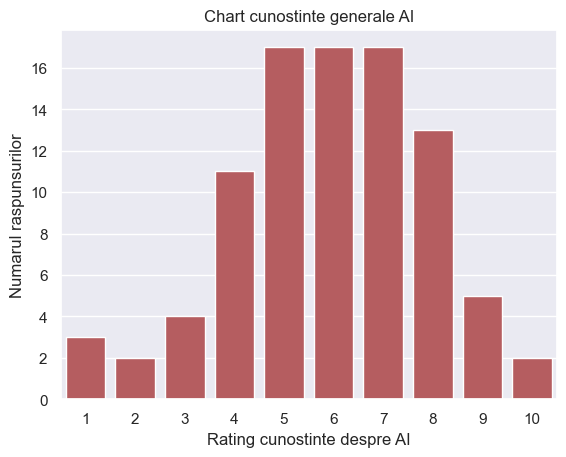

In [10]:
fig1 = sns.countplot(data=df,x='Q1.AI_knowledge',color='r')
fig1.set(xlabel='Rating cunostinte despre AI',ylabel='Numarul raspunsurilor',title='Chart cunostinte generale AI')

In [ ]:
##Question 2 What sources do you use to learn about the concept of artificial intelligence?

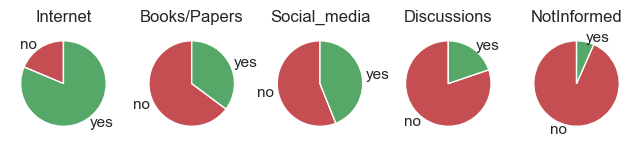

In [11]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(8, 8))
axes = [ax1,ax2,ax3,ax4,ax5]
columns = ['Q2#1.Internet','Q2#2.Books/Papers','Q2#3.Social_media','Q2#4.Discussions','Q2#5.NotInformed']
for i in range(5):
    axes[i].pie(df[columns[i]].value_counts()[[0,1]],colors='rg',startangle=90,labels=['no','yes'])
    axes[i].set_title(columns[i][5:])
plt.show()

In [ ]:
##2ii is there any correlation betweent the sources used?

In [12]:
df[['Q2#1.Internet','Q2#2.Books/Papers','Q2#3.Social_media','Q2#4.Discussions','Q2#5.NotInformed']].corr().round(2)

,Q2#1.Internet,Q2#2.Books/Papers,Q2#3.Social_media,Q2#4.Discussions,Q2#5.NotInformed
Q2#1.Internet,1.00,-0.00,0.14,0.10,-0.55
Q2#2.Books/Papers,-0.00,1.00,0.04,0.10,-0.20
Q2#3.Social_media,0.14,0.04,1.00,0.28,-0.24
Q2#4.Discussions,0.10,0.10,0.28,1.00,-0.13
Q2#5.NotInformed,-0.55,-0.20,-0.24,-0.13,1.00


In [ ]:
##2iii how is a student's ai knowledge rating related to their sources of information?



In [18]:
columns

['Q2#1.Internet',
 'Q2#2.Books/Papers',
 'Q2#3.Social_media',
 'Q2#4.Discussions',
 'Q2#5.NotInformed']

In [13]:
list = []
for i in columns:
    x1 = df[df[i]==0]['Q1.AI_knowledge'].mean().round(2)
    x2 = df[df[i]==1]['Q1.AI_knowledge'].mean().round(2)
    list.append([i,x1,x2,x2-x1])
df2 = pd.DataFrame(list)
df2.columns = ['Answer', 'No - MeanQ1', 'Yes - MeanQ1', 'Absolute Change']
df2.set_index(['Answer'],inplace=True)
df2.head(5)

,No - MeanQ1,Yes - MeanQ1,Absolute Change
Answer,,,
Q2#1.Internet,5.00,6.12,1.12
Q2#2.Books/Papers,5.42,6.81,1.39
Q2#3.Social_media,5.41,6.55,1.14
Q2#4.Discussions,5.85,6.17,0.32
Q2#5.NotInformed,6.13,2.83,-3.30
